# **Sentiment Analysis Through NLP**

**Importing Libraries**

In [421]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


**Loading our dataset**

In [422]:
df = pd.read_csv('../input/nlp-getting-started/train.csv')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [424]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

**Dropping Null Values**

In [425]:
df = df.dropna(axis=1)
df

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,Police investigating after an e-bike collided ...,1


In [426]:
df.columns

Index(['id', 'text', 'target'], dtype='object')

In [427]:
tweets = df.drop(['id', 'target'], axis=1)
tweets.head()

,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...


In [428]:
print(tweets['text'].iloc[0],"\n")
print(tweets['text'].iloc[1],"\n")
print(tweets['text'].iloc[2],"\n")
print(tweets['text'].iloc[3],"\n")
print(tweets['text'].iloc[4],"\n")

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all 

Forest fire near La Ronge Sask. Canada 

All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected 

13,000 people receive #wildfires evacuation orders in California  

Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  



In [429]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
dtypes: object(1)
memory usage: 59.6+ KB


# **Text Processing :**

In [430]:
def data_processing(text):
        text = text.lower()
        text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
        text = re.sub(r'\@w+|\#','',text)
        text = re.sub(r'[^\w\s]','',text)
        text_tokens = word_tokenize(text)
        filtered_text = [w for w in text_tokens if not w in stop_words]
        return " ".join(filtered_text)

In [431]:
tweets.text= tweets['text'].apply(data_processing)

In [432]:
tweets = tweets.drop_duplicates('text')

**Finding the polarity of the text through TextBlob**

In [433]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
tweets['polarity'] = tweets['text'].apply(polarity)

In [434]:
stemmer = PorterStemmer()
def stemming(data):
    data = [stemmer.stem(word) for word in data]
    return data

In [435]:
tweets['SplittedText'] = tweets['text'].apply(lambda x: stemming(x))
tweets.head()

,text,polarity,SplittedText
0,deeds reason earthquake may allah forgive us,0.0,"[d, e, e, d, s, , r, e, a, s, o, n, , e, a, ..."
1,forest fire near la ronge sask canada,0.1,"[f, o, r, e, s, t, , f, i, r, e, , n, e, a, ..."
2,residents asked shelter place notified officer...,-0.1,"[r, e, s, i, d, e, n, t, s, , a, s, k, e, d, ..."
3,13000 people receive wildfires evacuation orde...,0.0,"[1, 3, 0, 0, 0, , p, e, o, p, l, e, , r, e, ..."
4,got sent photo ruby alaska smoke wildfires pou...,0.0,"[g, o, t, , s, e, n, t, , p, h, o, t, o, , ..."


In [436]:
print(tweets['text'].iloc[0],"\n")
print(tweets['text'].iloc[1],"\n")
print(tweets['text'].iloc[2],"\n")
print(tweets['text'].iloc[3],"\n")
print(tweets['text'].iloc[4],"\n")

deeds reason earthquake may allah forgive us 

forest fire near la ronge sask canada 

residents asked shelter place notified officers evacuation shelter place orders expected 

13000 people receive wildfires evacuation orders california 

got sent photo ruby alaska smoke wildfires pours school 



In [437]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7480 entries, 0 to 7612
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          7480 non-null   object 
 1   polarity      7480 non-null   float64
 2   SplittedText  7480 non-null   object 
dtypes: float64(1), object(2)
memory usage: 233.8+ KB


In [438]:
tweets.head()

,text,polarity,SplittedText
0,deeds reason earthquake may allah forgive us,0.0,"[d, e, e, d, s, , r, e, a, s, o, n, , e, a, ..."
1,forest fire near la ronge sask canada,0.1,"[f, o, r, e, s, t, , f, i, r, e, , n, e, a, ..."
2,residents asked shelter place notified officer...,-0.1,"[r, e, s, i, d, e, n, t, s, , a, s, k, e, d, ..."
3,13000 people receive wildfires evacuation orde...,0.0,"[1, 3, 0, 0, 0, , p, e, o, p, l, e, , r, e, ..."
4,got sent photo ruby alaska smoke wildfires pou...,0.0,"[g, o, t, , s, e, n, t, , p, h, o, t, o, , ..."


**Segregating the tweets based up on the polarities**

In [439]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [440]:
tweets['sentiment'] = tweets['polarity'].apply(sentiment)

In [441]:
tweets.head()

,text,polarity,SplittedText,sentiment
0,deeds reason earthquake may allah forgive us,0.0,"[d, e, e, d, s, , r, e, a, s, o, n, , e, a, ...",Neutral
1,forest fire near la ronge sask canada,0.1,"[f, o, r, e, s, t, , f, i, r, e, , n, e, a, ...",Positive
2,residents asked shelter place notified officer...,-0.1,"[r, e, s, i, d, e, n, t, s, , a, s, k, e, d, ...",Negative
3,13000 people receive wildfires evacuation orde...,0.0,"[1, 3, 0, 0, 0, , p, e, o, p, l, e, , r, e, ...",Neutral
4,got sent photo ruby alaska smoke wildfires pou...,0.0,"[g, o, t, , s, e, n, t, , p, h, o, t, o, , ...",Neutral


**Data Visualization**

<AxesSubplot:xlabel='sentiment', ylabel='count'>

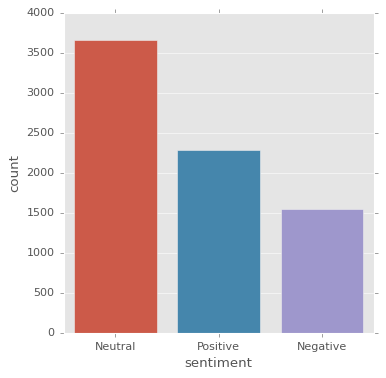

In [442]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = tweets)

Text(0.5, 1.0, 'Sentiments')

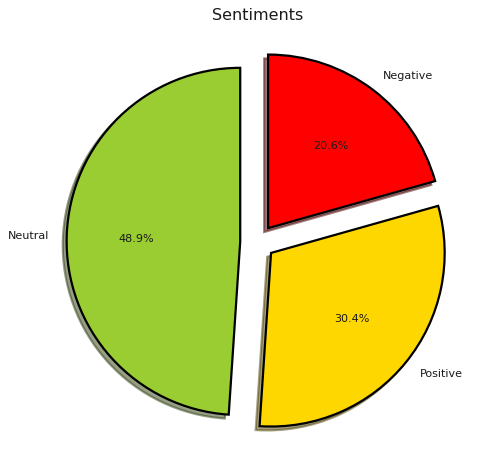

In [443]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweets['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Sentiments')

In [444]:
positive_tweets = tweets[tweets.sentiment == 'Positive']
positive_tweets = positive_tweets.sort_values(['polarity'], ascending= False)
positive_tweets.head()

,text,polarity,SplittedText,sentiment
2815,youssefyamani add fez weather equation best re...,1.0,"[y, o, u, s, s, e, f, y, a, m, a, n, i, , a, ...",Positive
2217,fifth predynastic king legendary period deluge...,1.0,"[f, i, f, t, h, , p, r, e, d, y, n, a, s, t, ...",Positive
2035,therealrittz fettilootch slanglucci oppression...,1.0,"[t, h, e, r, e, a, l, r, i, t, t, z, , f, e, ...",Positive
2040,bluebirddenver fettilootch slanglucci oppressi...,1.0,"[b, l, u, e, b, i, r, d, d, e, n, v, e, r, , ...",Positive
3175,nieces especially good kids megan swanger ruth...,1.0,"[n, i, e, c, e, s, , e, s, p, e, c, i, a, l, ...",Positive


In [445]:
negative_tweets = tweets[tweets.sentiment == 'Negative']
negative_tweets = negative_tweets.sort_values(['polarity'], ascending= False)
negative_tweets.head()

,text,polarity,SplittedText,sentiment
1030,womens buckle casual stylish shoulder handbags...,-2.775558e-17,"[w, o, m, e, n, s, , b, u, c, k, l, e, , c, ...",Negative
4048,first year forest service spent half annual bu...,-5.555556e-03,"[f, i, r, s, t, , y, e, a, r, , f, o, r, e, ...",Negative
3361,faan orders evacuation abandoned aircraft mma ...,-8.333333e-03,"[f, a, a, n, , o, r, d, e, r, s, , e, v, a, ...",Negative
6082,mtsalert orange amp blue line riders expect de...,-8.333333e-03,"[m, t, s, a, l, e, r, t, , o, r, a, n, g, e, ...",Negative
3601,success permanent amp failure fatal,-8.333333e-03,"[s, u, c, c, e, s, s, , p, e, r, m, a, n, e, ...",Negative


In [446]:
neutral_tweets = tweets[tweets.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,SplittedText,sentiment
0,deeds reason earthquake may allah forgive us,0.0,"[d, e, e, d, s, , r, e, a, s, o, n, , e, a, ...",Neutral
5101,closing eyes disaster state department unaware...,0.0,"[c, l, o, s, i, n, g, , e, y, e, s, , d, i, ...",Neutral
5104,fukushima mutant vegetable images sweep across...,0.0,"[f, u, k, u, s, h, i, m, a, , m, u, t, a, n, ...",Neutral
5106,fukushima story nuclear disaster httptcoikpngs...,0.0,"[f, u, k, u, s, h, i, m, a, , s, t, o, r, y, ...",Neutral
5108,573 deaths certified government ûnuclear disas...,0.0,"[5, 7, 3, , d, e, a, t, h, s, , c, e, r, t, ...",Neutral


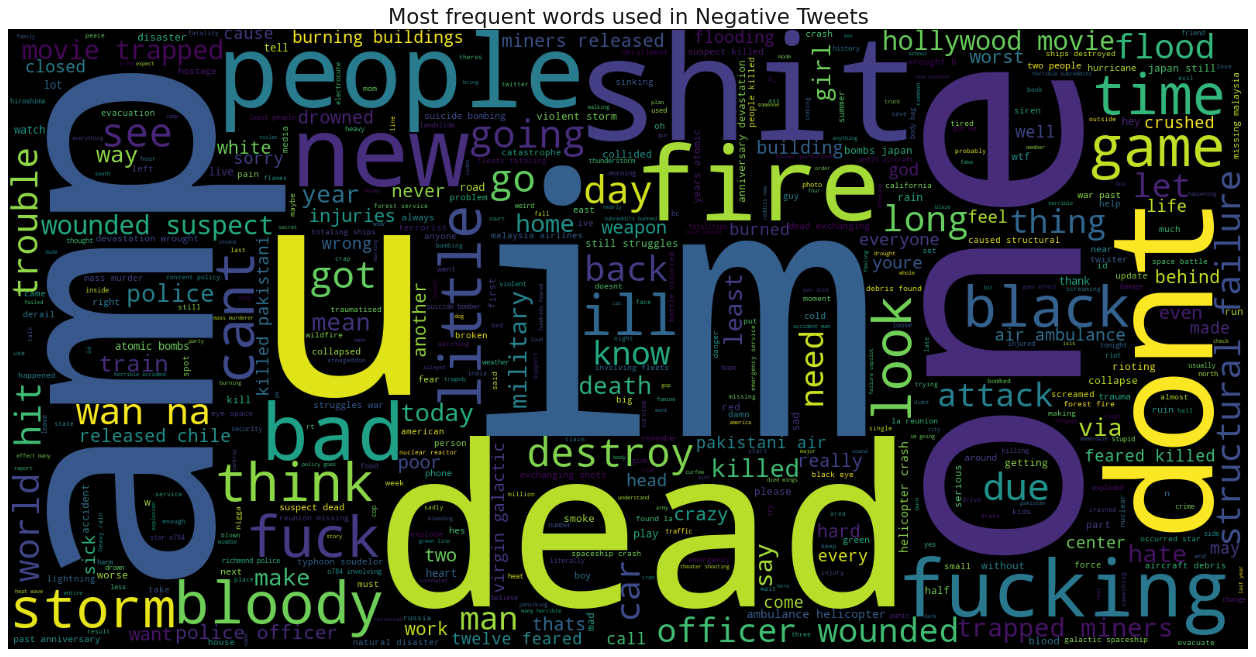

In [447]:
text = ' '.join([word for word in negative_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words used in Negative Tweets', fontsize=19)
plt.show()

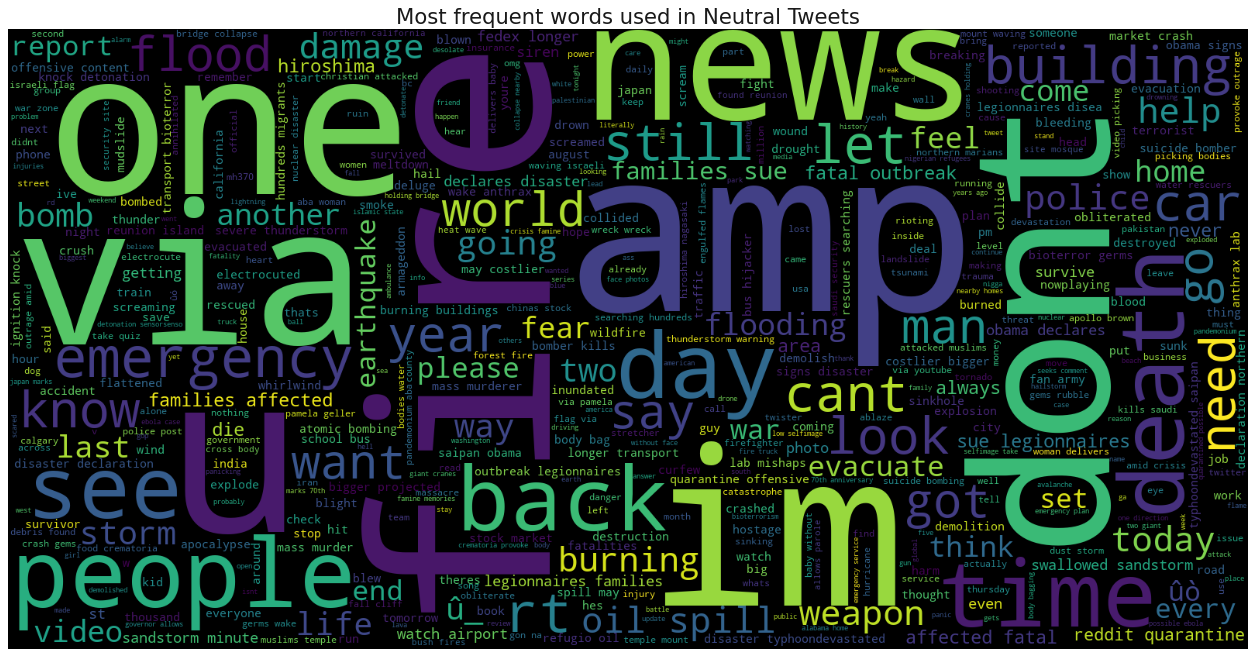

In [448]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words used in Neutral Tweets', fontsize=19)
plt.show()

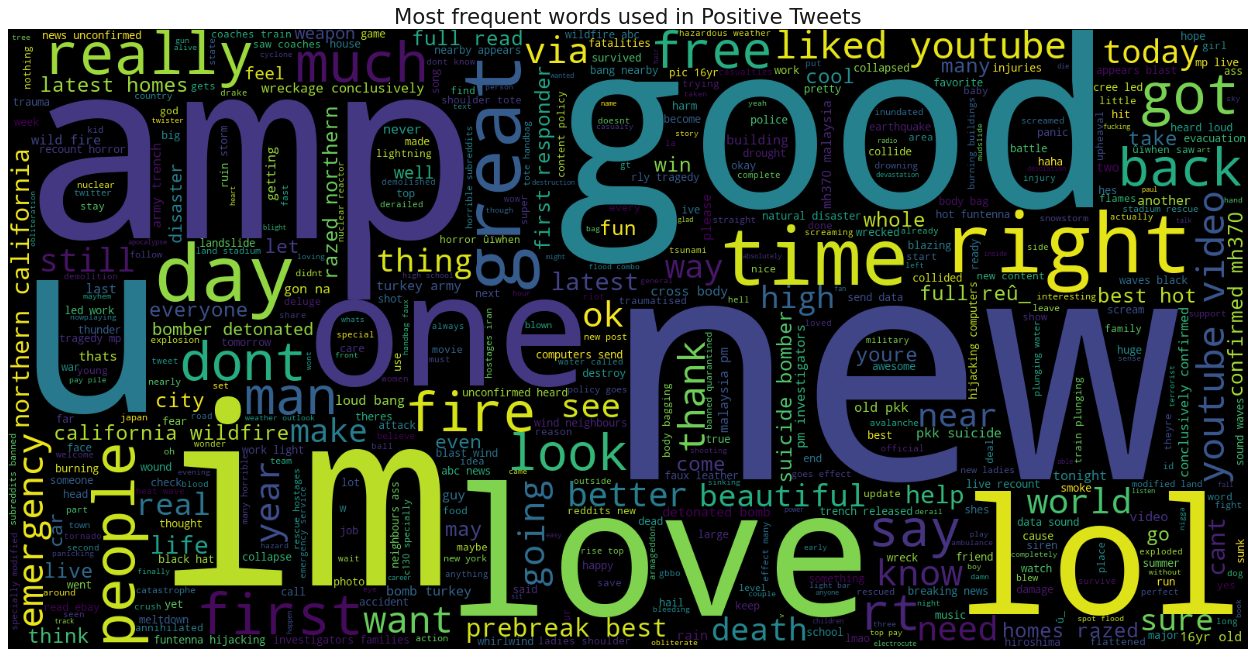

In [449]:
text = ' '.join([word for word in positive_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words used in Positive Tweets', fontsize=19)
plt.show()

In [450]:
vect = CountVectorizer(ngram_range=(1,2)).fit(tweets['text'])
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 74579

First 20 features:
 ['0011' '0011 utc' '001116' '001116 utc20150805' '0025' '0025 updated'
 '005225' '005225 utc20150805' '010156' '010156 okinawa' '010217'
 '010217 okinawa' '0104' '0104 utc' '0104 utc5km' '010401'
 '010401 utc20150805' '0106' '0106 bmw' '0111']


In [451]:
X = tweets['text']
Y = tweets['sentiment']
X = vect.transform(X)

**Training And Testing Our Model**

In [452]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [453]:
x_train.shape

(5610, 74579)

In [454]:
y_train.shape

(5610,)

In [455]:
x_test.shape

(1870, 74579)

In [456]:
y_test.shape

(1870,)

**Testing Accuracy Of Our Model**

In [457]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
pred = logreg.predict(x_test)
logreg_acc = accuracy_score(Pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 79.84%


In [458]:
print(confusion_matrix(y_test, pred))

[[202 144  23]
 [ 10 895   4]
 [ 18 178 396]]


In [459]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    Negative       0.88      0.55      0.67       369
     Neutral       0.74      0.98      0.84       909
    Positive       0.94      0.67      0.78       592

    accuracy                           0.80      1870
   macro avg       0.85      0.73      0.77      1870
weighted avg       0.83      0.80      0.79      1870



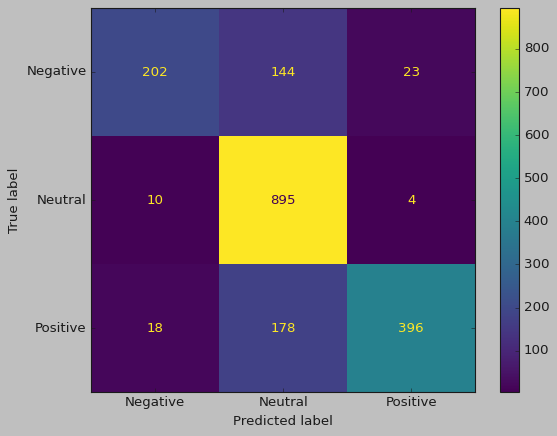

In [460]:
style.use('classic')
cm = confusion_matrix(y_test, pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)


In [ ]:
print("Best parameters:", grid.best_params_)

In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))


In [ ]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

In [ ]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

**(Accuracy Level Increased From 79.84 to 82.57)**

In [ ]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)


In [ ]:
print("Best parameter:", grid.best_params_)

In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))


**(No Change In The Accuracy Of Our Prediction Model)**

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))